In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
from itertools import product

from paths import *
from ssd_paths import *
from misc_recorder import *

In [2]:
hyper_dir = model_save_
ts = "0121181130"

In [3]:
class ResReader: 
    def __init__(self, dir, runtype="ff", cv="full"):
        self.dir = dir
        self.runtype = runtype
        self.cv = cv
    
    def read(self):
        read_dir = os.path.join(self.dir, self.cv, self.runtype)
        train = ListRecorder(os.path.join(read_dir, 'train.acc'))
        valid = ListRecorder(os.path.join(read_dir, f'valid.acc'))
        fullvalid = ListRecorder(os.path.join(read_dir, f'full_valid.acc'))
        train.read()
        valid.read()
        fullvalid.read()
        return train.get(), valid.get(), fullvalid.get()


def get_reses(dir):
    reses = {}
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        reses[f"{runtype}-{cv}"] = [x - y for x, y in zip(res[1], res[2])]
    return reses

def draw(reses, dir): 
    plt.figure(figsize=(10, 6))
    for label, data in reses.items():
        plt.plot(data, marker='o', linestyle='-', label=label)

    plt.xlabel('Epoch')
    plt.ylabel('Target-Full Accuracy Difference')
    plt.title('Difference between Target and Full')
    plt.legend()
    plt.grid(True)
    # plt.savefig(os.path.join(dir, "diff.png"))
    plt.show()

In [6]:
reseses = []
for run_case in range(1, 11): 
    reses = {}
    dir = os.path.join(hyper_dir, f"H12-{ts}-{run_case}", "large")
    for runtype, cv in list(product(["lf", "hf"], ["c", "v"])):
        res = ResReader(dir, runtype=runtype, cv=cv).read()
        val = [x - y for x, y in zip(res[0], res[2])]
        # val = np.mean([x - y for x, y in zip(res[1], res[2])][10:20])
        # val = np.mean(res[2][35:40])
        reses[f"{runtype}-{cv}"] = val
        # if f"{runtype}-{cv}" in reses.keys(): 
        #     reses[f"{runtype}-{cv}"].append(val)
        # else: 
        #     reses[f"{runtype}-{cv}"] = [val]
    reseses.append(reses)

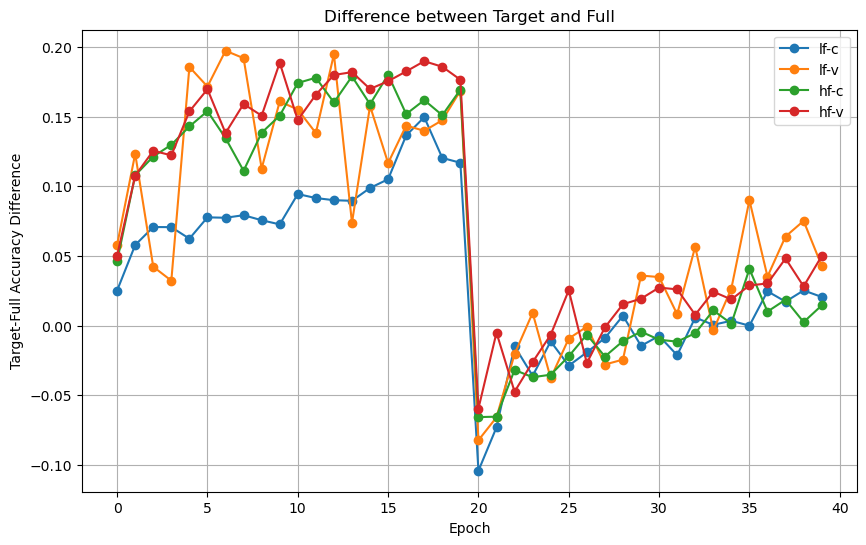

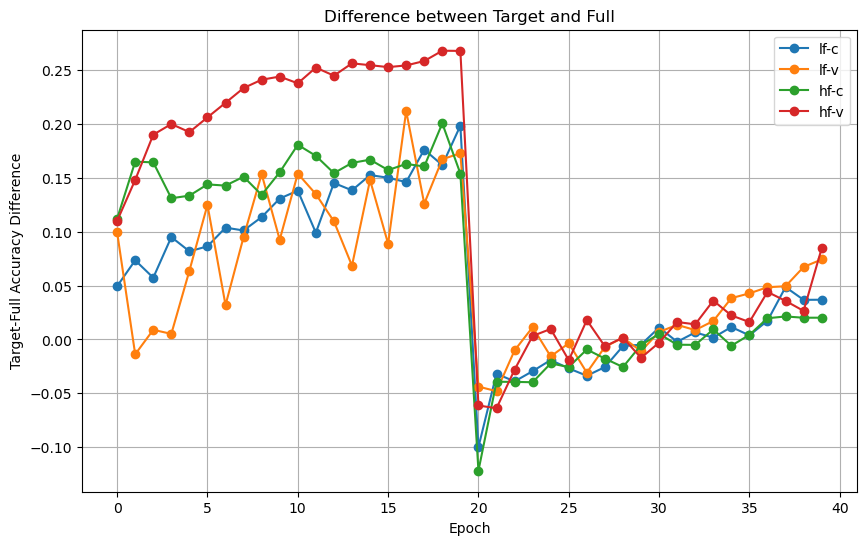

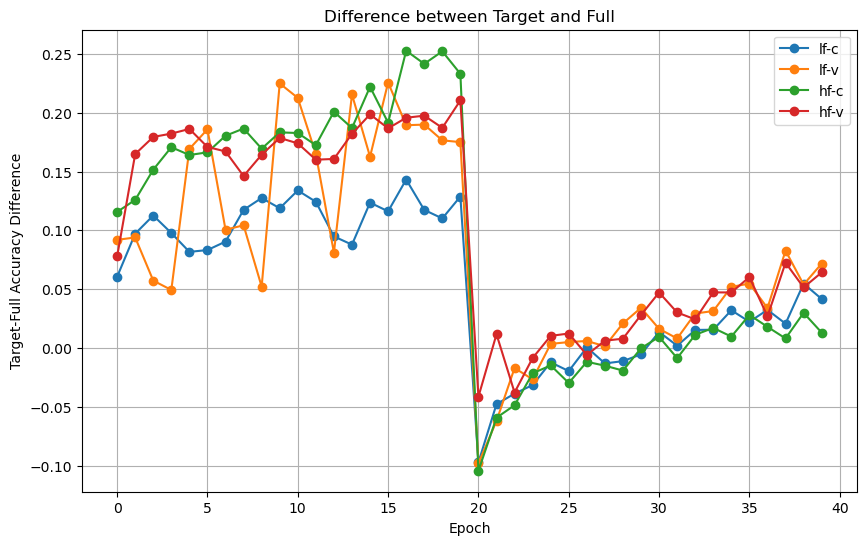

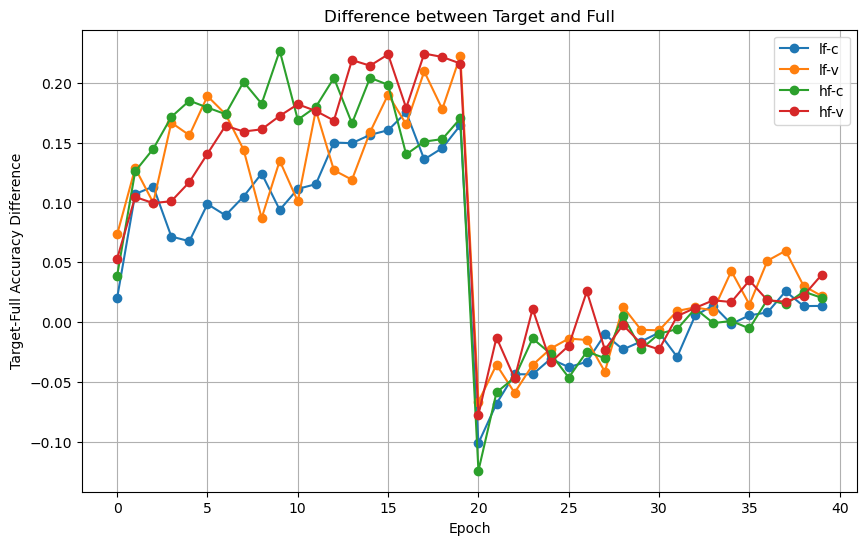

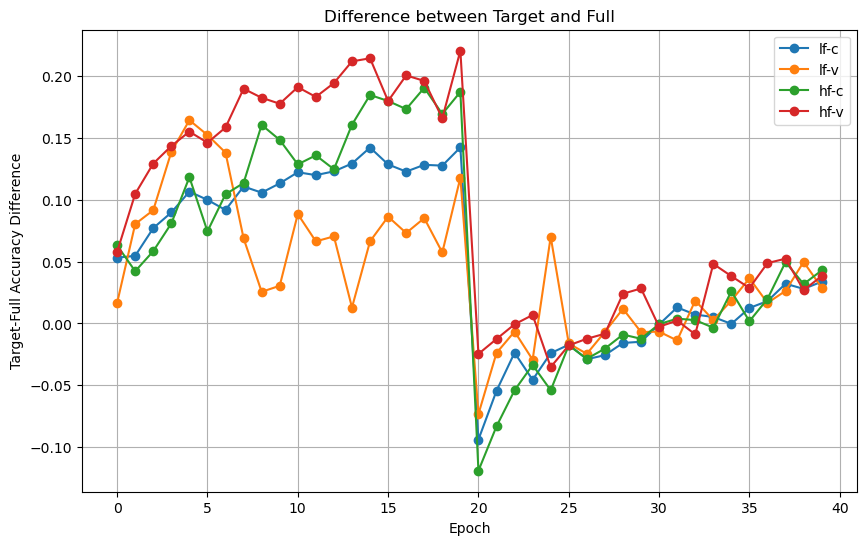

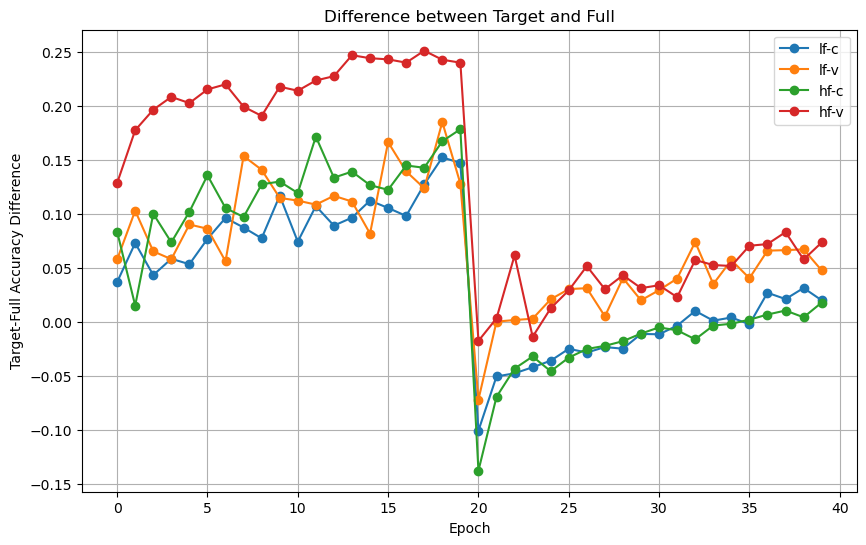

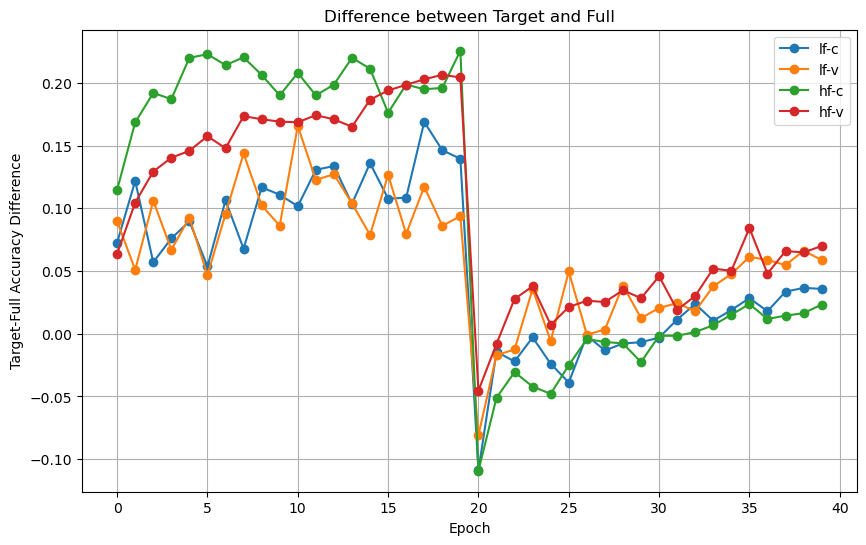

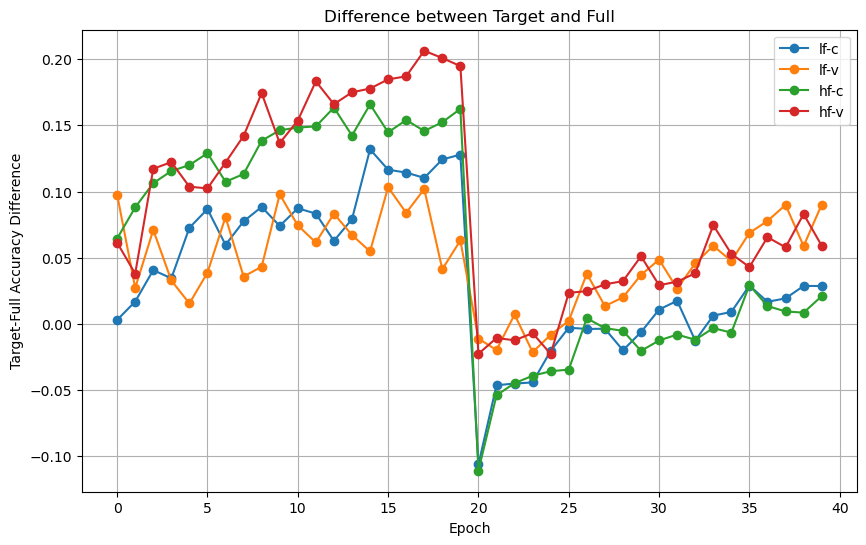

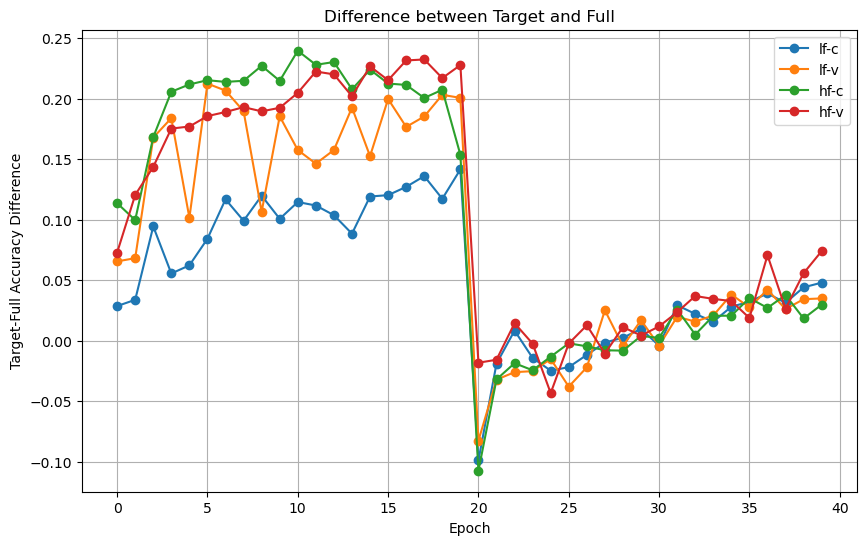

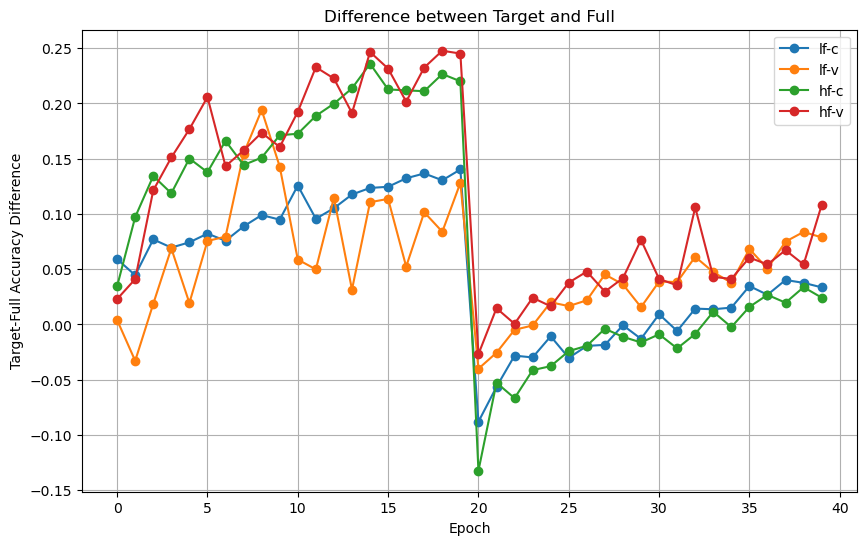

In [7]:
for reses in reseses: 
    draw(reses, hyper_dir)

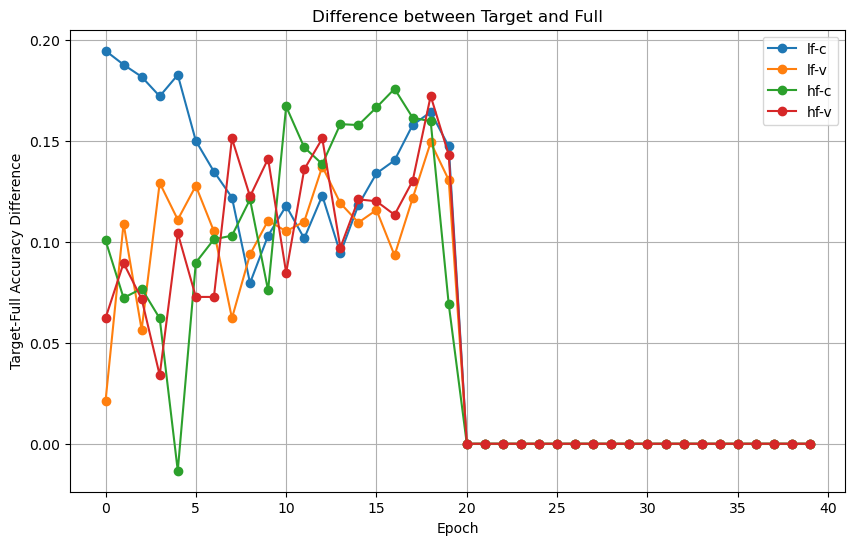

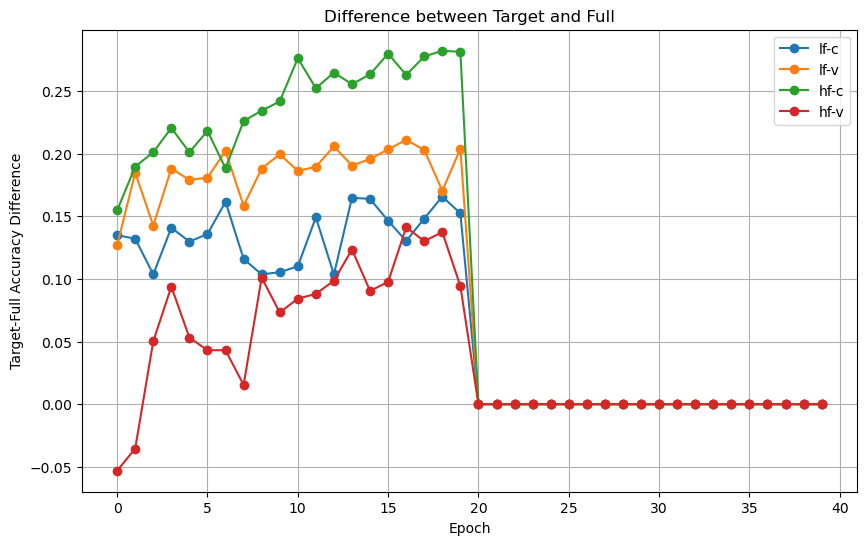

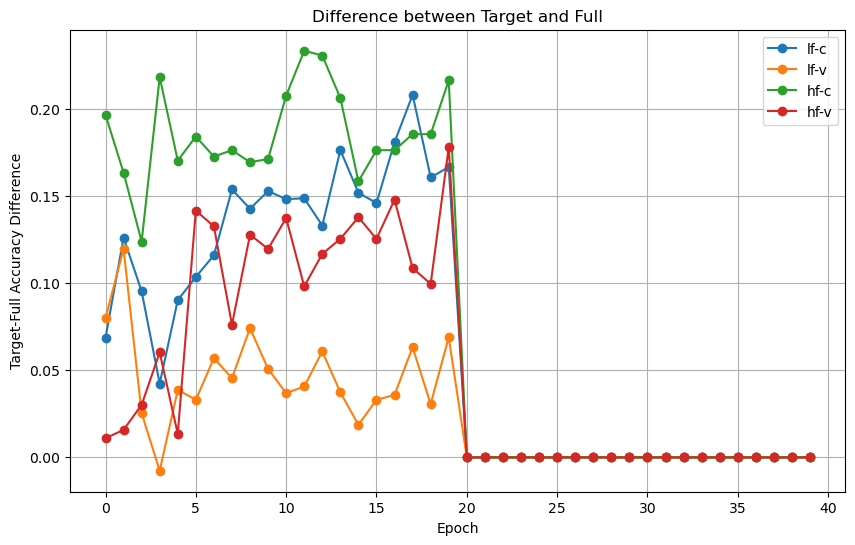

In [9]:
for model_type in ["small", "medium", "large"]: 
    to_read_model_dir = os.path.join(hyper_dir, model_type)
    reses = get_reses(to_read_model_dir)
    draw(reses, to_read_model_dir)

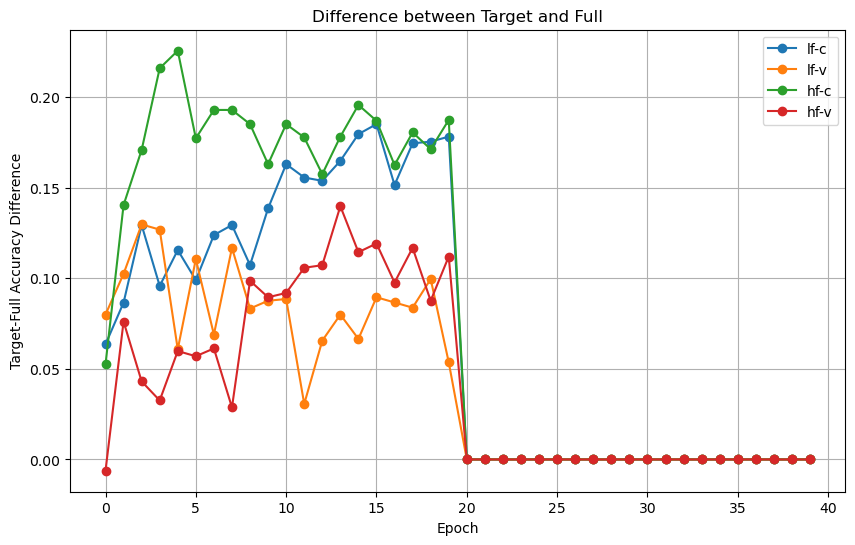

In [10]:
hyper_dir = os.path.join(model_save_, 'H12-5189911633')
for model_type in ["large"]: 
    to_read_model_dir = os.path.join(hyper_dir, model_type)
    reses = get_reses(to_read_model_dir)
    draw(reses, to_read_model_dir)